# APLICACI√ìN DE PCA + CLUSTER

### Proyecto: An√°lisis y predicci√≥n de la deserci√≥n de estudiantes en la Universidad Peruana Uni√≥n

In [25]:
import numpy as np
import pandas as pd
# ==========================
# CARGANDO DATOS
# ==========================
data = pd.read_csv("upeu_data_desercion.csv")  # aseg√∫rate que 'State' exista

In [26]:
#Resumen de la data
data.info
print('df.columns:',data.columns)
print('df.shape:',data.shape)
data.head(10)

df.columns: Index(['Nombres Completos', 'G√©nero', 'Modo de solicitud',
       'Orden de solicitud', 'Facultad', 'Trasladado(a)',
       'Necesidades educativas especiales', 'Procedencia', 'Vivienda',
       'Crianza Adventista', 'Estado civil', 'Titulaci√≥n de la madre',
       'Titulaci√≥n del padre', 'Ocupaci√≥n de la madre', 'Ocupaci√≥n del padre',
       'Formas de Pago', 'Descuento', 'Deuda', 'Matr√≠cula al d√≠a', 'Becario',
       'Edad', 'Unidades curriculares 1.¬∫ semestre (matriculadas)',
       'Unidades curriculares 1.¬∫ semestre (evaluadas)',
       'Unidades curriculares 1.¬∫ semestre (aprobadas)',
       'Desarrollo de Tareas (%)', 'Asistencia (%)',
       'Promedio ponderado del semestre', 'Situaci√≥n laboral',
       'Condici√≥n Final',
       '¬øLa distancia y la separaci√≥n de mi familia para estudiar en la universidad me hacen considerar abandonar mis estudios.?',
       '¬øLa incompatibilidad entre mis horarios de trabajo y las clases me llevar√≠a a abandonar la ca

Nombres Completos G√©nero                     Modo de solicitud  \
0   Diana Ram√≠rez Aguilar      M                       Ingreso directo   
1   Andr√©s S√°nchez Su√°rez      H          Examen de admisi√≥n ordinario   
2    Pedro Torres S√°nchez      H          Examen de admisi√≥n ordinario   
3  Miguel Vargas Mart√≠nez      H                       Ingreso directo   
4     Jorge Rojas Ram√≠rez      H          Examen de admisi√≥n ordinario   
5   Patricia P√©rez Flores      M          Examen de admisi√≥n ordinario   
6  Karla Mart√≠nez Mendoza      M          Examen de admisi√≥n ordinario   
7   Miguel Castro Mendoza      H                 Ingreso por reingreso   
8  Jessica Gonzales L√≥pez      M                       Ingreso directo   
9   Claudia Su√°rez Romero      M  Ingreso por convenio o beca especial   

  Orden de solicitud                      Facultad Trasladado(a)  \
0     Segunda Opci√≥n                      Teolog√≠a            S√≠   
1     Segunda Opci√≥n          Ciencias de la Salud            No   
2     Primera Opci√≥n  Ciencias Humanas y Educaci√≥n            No   
3     Primera Opci√≥n        Ciencias Empresariales            No   
4     Primera Opci√≥n  Ciencias Humanas y Educaci√≥n            No   
5     Tercera Opci√≥n        Ciencias Empresariales            No   
6     Segunda Opci√≥n        Ciencias Empresariales            No   
7     Segunda Opci√≥n          Ciencias de la Salud            No   
8     Primera Opci√≥n          Ciencias de la Salud            No   
9     Tercera Opci√≥n        Ciencias Empresariales            No   

  Necesidades educativas especiales Procedencia        Vivienda  \
0                                No   Provincia      Residencia   
1                                No        Lima  Alquila cuarto   
2                                No        Lima      Familiares   
3                                No   Provincia      Familiares   
4                                No        Lima      Residencia   
5                                No        Lima      Familiares   
6                                No   Provincia      Residencia   
7                                S√≠        Lima      Familiares   
8                                No        Lima      Residencia   
9                                No        Lima      Residencia   

  Crianza Adventista  ...  \
0                 No  ...   
1                 S√≠  ...   
2                 S√≠  ...   
3                 S√≠  ...   
4                 S√≠  ...   
5                 S√≠  ...   
6                 S√≠  ...   
7                 S√≠  ...   
8                 S√≠  ...   
9                 S√≠  ...   

  ¬øLa falta de recursos econ√≥micos, becas o facilidades de pago me har√≠a interrumpir mis estudios?  \
0                                                  5                                                 
1                                                  5                                                 
2                                                  2                                                 
3                                                  4                                                 
4                                                  5                                                 
5                                                  3                                                 
6                                                  2                                                 
7                                                  1                                                 
8                                                  3                                                 
9                                                  3                                                 

  ¬øMe siento poco integrado/a con mis compa√±eros y actividades universitarias, lo que me hace pensar en abandonar?  \
0                                                  2                                               

In [27]:
# 2) Eliminar la variable duplicada del target - con esto estoy eliminando la variable target_deserto porque me esta generando problemas para las m√©tricas
#data = data.drop(columns=["target_deserto"], errors="ignore")
#print('target_deserto eliminado de la data')

In [28]:
#Resumen estad√≠stico de todas las variables (describe()).
data.describe(include="all").T # incluye categ√≥ricas y num√©ricas

count unique  \
Nombres Completos                                     5000   4481   
G√©nero                                                5000      2   
Modo de solicitud                                     5000      6   
Orden de solicitud                                    5000      3   
Facultad                                              5000      5   
Trasladado(a)                                         5000      2   
Necesidades educativas especiales                     5000      2   
Procedencia                                           5000      3   
Vivienda                                              5000      3   
Crianza Adventista                                    5000      2   
Estado civil                                          5000      2   
Titulaci√≥n de la madre                                5000      5   
Titulaci√≥n del padre                                  5000      5   
Ocupaci√≥n de la madre                                 5000     10   
Ocupaci√≥n del padre                                   5000     10   
Formas de Pago                                        5000      3   
Descuento                                           5000.0    NaN   
Deuda                                               5000.0    NaN   
Matr√≠cula al d√≠a                                      5000      2   
Becario                                               5000      2   
Edad                                                5000.0    NaN   
Unidades curriculares 1.¬∫ semestre (matriculadas)   5000.0    NaN   
Unidades curriculares 1.¬∫ semestre (evaluadas)      5000.0    NaN   
Unidades curriculares 1.¬∫ semestre (aprobadas)      5000.0    NaN   
Desarrollo de Tareas (%)                            5000.0    NaN   
Asistencia (%)                                      5000.0    NaN   
Promedio ponderado del semestre                     5000.0    NaN   
Situaci√≥n laboral                                     5000      3   
Condici√≥n Final                                       5000      2   
¬øLa distancia y la separaci√≥n de mi familia par...  5000.0    NaN   
¬øLa incompatibilidad entre mis horarios de trab...  5000.0    NaN   
¬øLa calidad de la ense√±anza y las metodolog√≠as ...  5000.0    NaN   
¬øLa falta de recursos econ√≥micos, becas o facil...  5000.0    NaN   
¬øMe siento poco integrado/a con mis compa√±eros ...  5000.0    NaN   
¬øEl estr√©s, la ansiedad u otros problemas de bi...  5000.0    NaN   
¬øLa falta de seguridad dentro o cerca del campu...  5000.0    NaN   
¬øLa retroalimentaci√≥n tard√≠a o poco clara de lo...  5000.0    NaN   
¬øLa carrera/facultad donde estoy matriculado no...  5000.0    NaN   
¬øLa dificultad de los cursos supera mis capacid...  5000.0    NaN   
¬øCuento con poco apoyo familiar para continuar ...  5000.0    NaN   
¬øMe cuesta adaptarme a la cultura y normas inst...  5000.0    NaN   
¬øNo veo una trayectoria profesional clara a par...  5000.0    NaN   

                                                                                top  \
Nombres Completos                                              Rosa Mart√≠nez Torres   
G√©nero                                                                            M   
Modo de solicitud                                      Examen de admisi√≥n ordinario   
Orden de solicitud                                                   Primera Opci√≥n   
Facultad                                                     Ciencias Empresariales   
Trasladado(a)                                                                    No   
Necesidades educativas especiales                                                No   
Procedencia                                                                    Lima   
Vivienda                                                                 Familiares   
Crianza Adventista                                                               S√≠   
Estado civil                                                                Soltero   
Tit

In [29]:
# Separar los datos seg√∫ sus Tipos de variables (num√©ricas, categ√≥ricas). fechas se considera como cat aunque tambi√©n puedes separr
numeric_data = data.select_dtypes(include=[np.number])
categor_data = data.select_dtypes(exclude=[np.number])
print ("There are {} numeric and {} categorical columns in train data".format(numeric_data.shape[1],categor_data.shape[1]))

There are 22 numeric and 20 categorical columns in train data


In [30]:
numeric_data.describe().T
# Puedes ver la Distribuci√≥n de variables num√©ricas (cantidad o freq, media, mediana, desviaci√≥n est√°ndar, m√≠n, m√°x. etc.).

count        mean  \
Descuento                                           5000.0  498.158632   
Deuda                                               5000.0  960.131896   
Edad                                                5000.0   21.595400   
Unidades curriculares 1.¬∫ semestre (matriculadas)   5000.0    5.999200   
Unidades curriculares 1.¬∫ semestre (evaluadas)      5000.0    5.502000   
Unidades curriculares 1.¬∫ semestre (aprobadas)      5000.0    3.511800   
Desarrollo de Tareas (%)                            5000.0   79.186820   
Asistencia (%)                                      5000.0   84.553320   
Promedio ponderado del semestre                     5000.0   12.746932   
¬øLa distancia y la separaci√≥n de mi familia par...  5000.0    2.976800   
¬øLa incompatibilidad entre mis horarios de trab...  5000.0    2.999000   
¬øLa calidad de la ense√±anza y las metodolog√≠as ...  5000.0    2.760400   
¬øLa falta de recursos econ√≥micos, becas o facil...  5000.0    3.556400   
¬øMe siento poco integrado/a con mis compa√±eros ...  5000.0    2.818000   
¬øEl estr√©s, la ansiedad u otros problemas de bi...  5000.0    2.930600   
¬øLa falta de seguridad dentro o cerca del campu...  5000.0    2.689200   
¬øLa retroalimentaci√≥n tard√≠a o poco clara de lo...  5000.0    2.695600   
¬øLa carrera/facultad donde estoy matriculado no...  5000.0    2.865000   
¬øLa dificultad de los cursos supera mis capacid...  5000.0    3.333400   
¬øCuento con poco apoyo familiar para continuar ...  5000.0    2.866200   
¬øMe cuesta adaptarme a la cultura y normas inst...  5000.0    2.858800   
¬øNo veo una trayectoria profesional clara a par...  5000.0    2.756600   

                                                           std    min  \
Descuento                                           346.624256   5.51   
Deuda                                               885.856249   0.87   
Edad                                                  3.072065  16.00   
Unidades curriculares 1.¬∫ semestre (matriculadas)     1.410389   4.00   
Unidades curriculares 1.¬∫ semestre (evaluadas)        1.513953   3.00   
Unidades curriculares 1.¬∫ semestre (aprobadas)        1.331546   1.00   
Desarrollo de Tareas (%)                             10.126950  38.30   
Asistencia (%)                                        8.251159  50.60   
Promedio ponderado del semestre                       2.990212   5.00   
¬øLa distancia y la separaci√≥n de mi familia par...    1.502902   1.00   
¬øLa incompatibilidad entre mis horarios de trab...    1.549929   1.00   
¬øLa calidad de la ense√±anza y las metodolog√≠as ...    1.535534   1.00   
¬øLa falta de recursos econ√≥micos, becas o facil...    1.450669   1.00   
¬øMe siento poco integrado/a con mis compa√±eros ...    1.518070   1.00   
¬øEl estr√©s, la ansiedad u otros problemas de bi...    1.532140   1.00   
¬øLa falta de seguridad dentro o cerca del campu...    1.508860   1.00   
¬øLa retroalimentaci√≥n tard√≠a o poco clara de lo...    1.540200   1.00   
¬øLa carrera/facultad donde estoy matriculado no...    1.528673   1.00   
¬øLa dificultad de los cursos supera mis capacid...    1.531507   1.00   
¬øCuento con poco apoyo familiar para continuar ...    1.535959   1.00   
¬øMe cuesta adaptarme a la cultura y normas inst...    1.539525   1.00   
¬øNo veo una trayectoria profesional clara a par...    1.518755   1.00   

                                                         25%     50%  \
Descuento                                           244.1675  415.49   
Deuda                                               331.0125  712.79   
Edad                                                 19.0000   22.00   
Unidades curriculares 1.¬∫ semestre (matriculadas)     5.0000    6.00   
Unidades curriculares 1.¬∫ semestre (evaluadas)        4.0000    5.00   
Unidades curriculares 1.¬∫ semestre (aprobadas)        3.0000    3.00   
Desarrollo de Tareas (%)                             72.5000   79.30   
Asistencia (%)                             

In [31]:
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column                                                                                                                    Non-Null Count  Dtype  
---  ------                                                                                                                    --------------  -----  
 0   Descuento                                                                                                                 5000 non-null   float64
 1   Deuda                                                                                                                     5000 non-null   float64
 2   Edad                                                                                                                      5000 non-null   int64  
 3   Unidades curriculares 1.¬∫ semestre (matriculadas)                                                                         5000 non-n

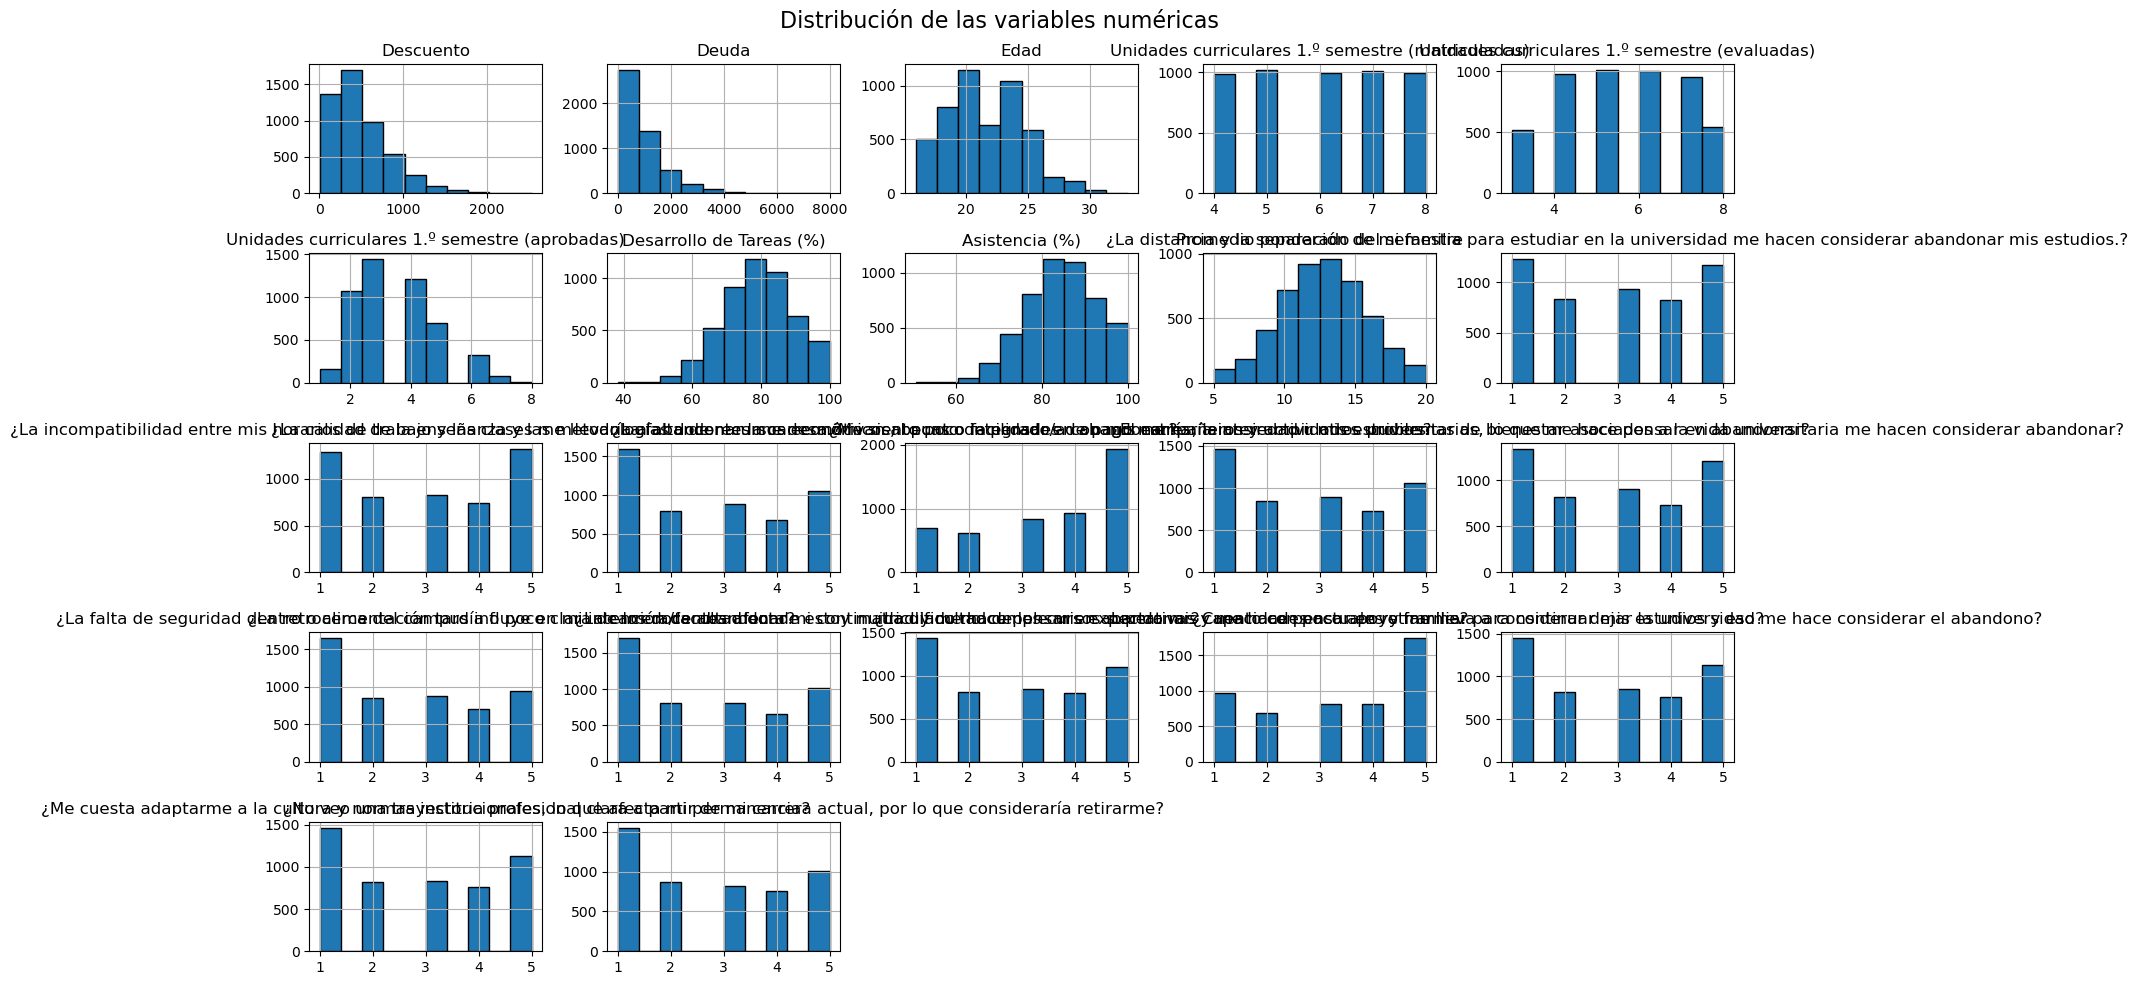

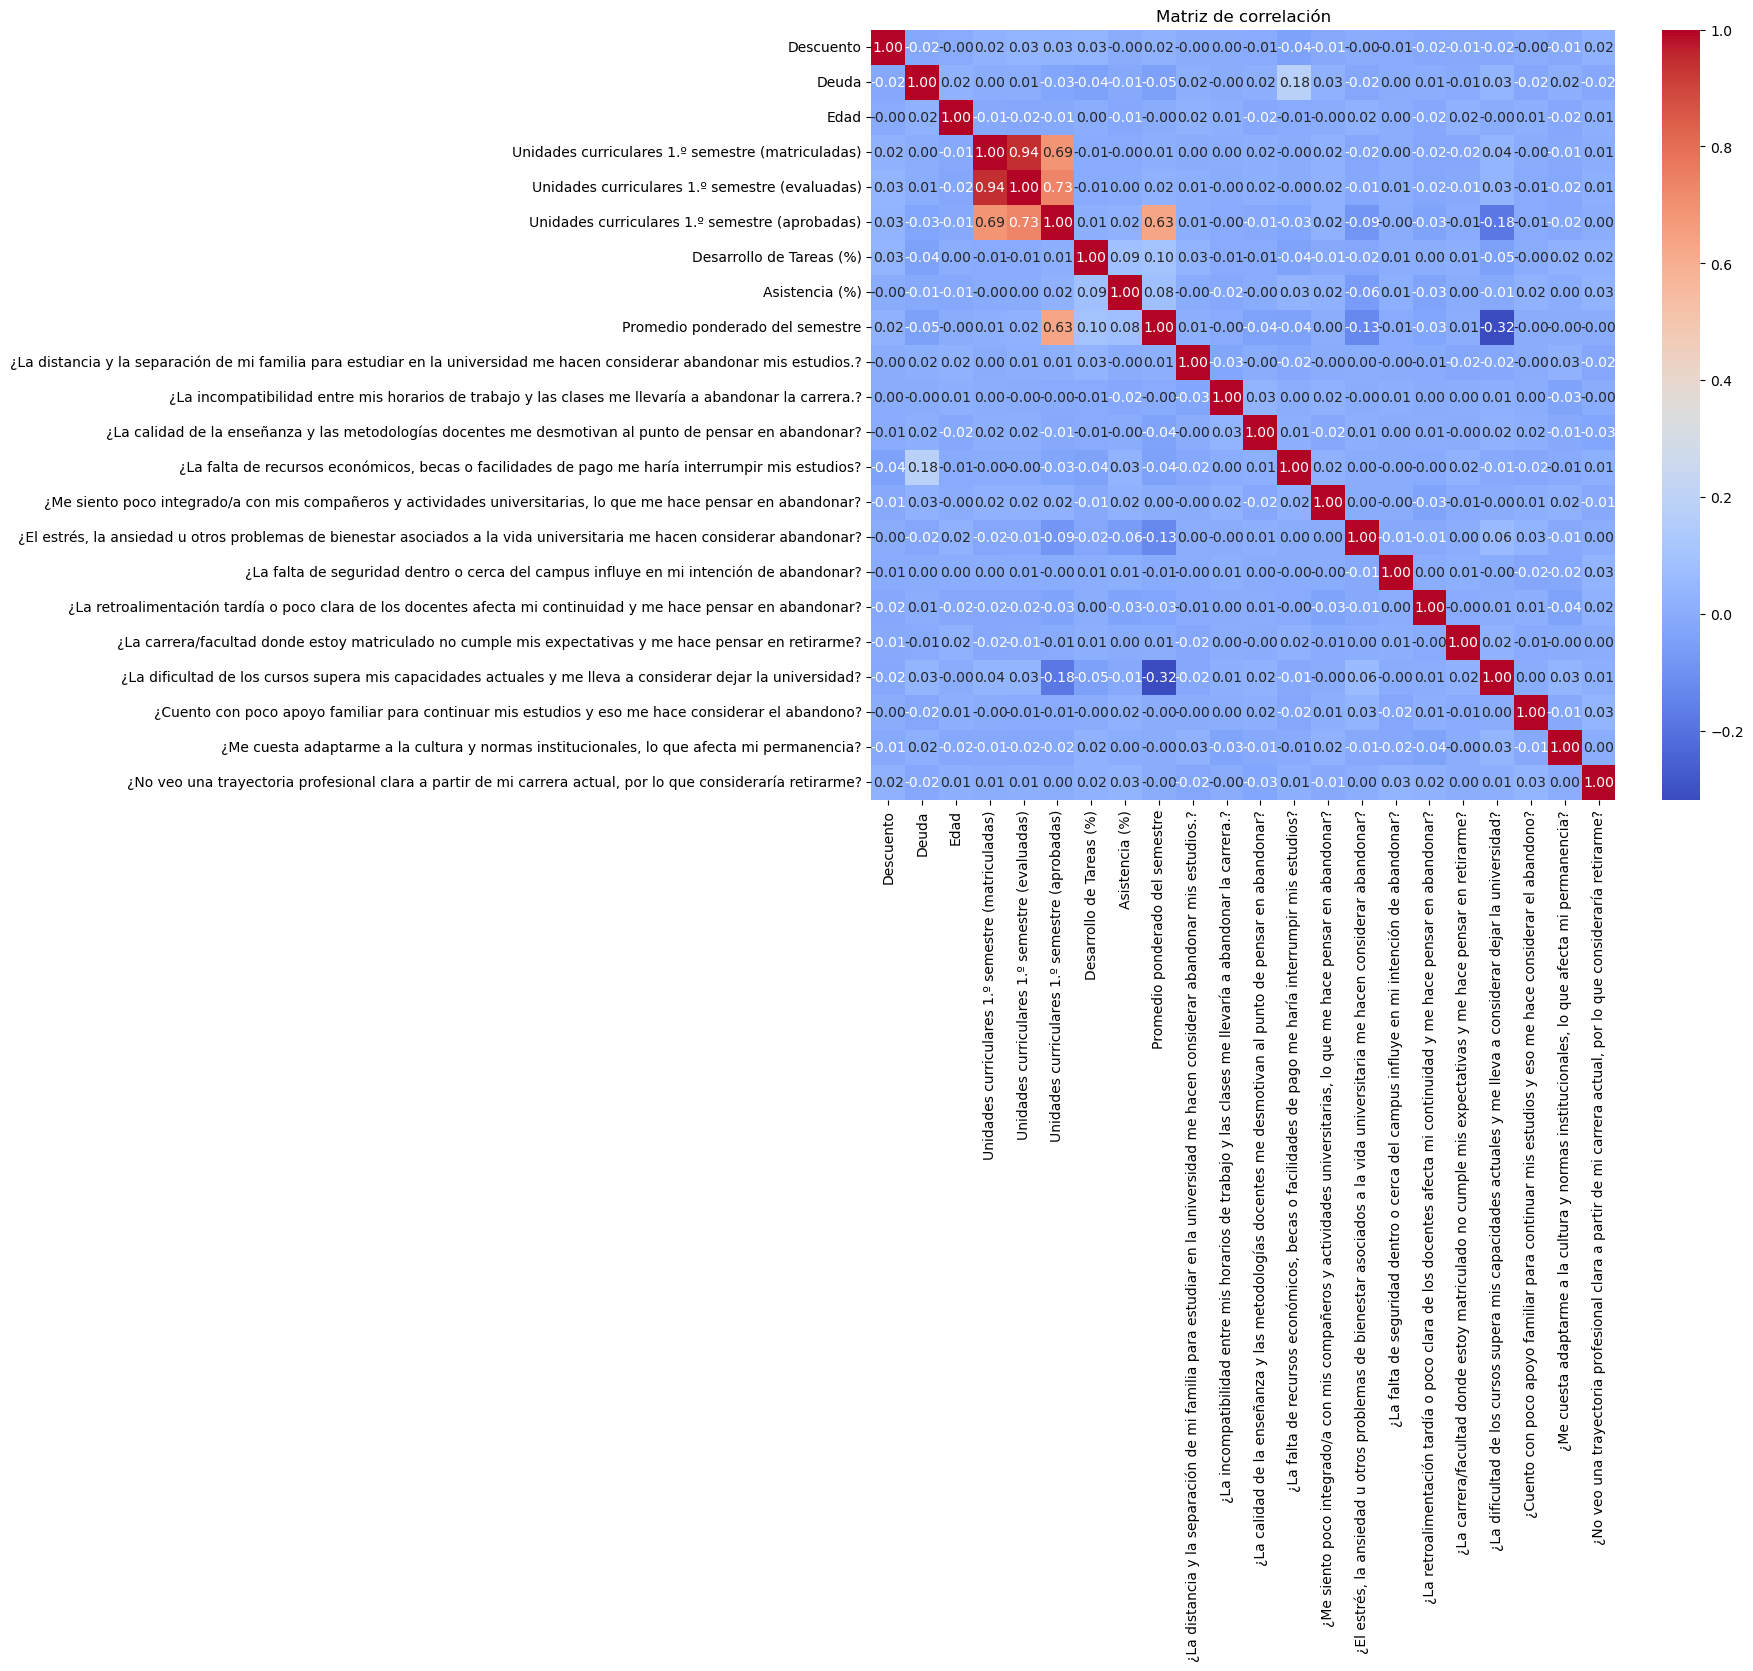

In [32]:
# Histogramas
import matplotlib.pyplot as plt
numeric_data.hist(figsize=(15, 10), bins=10, edgecolor='black')
plt.suptitle("Distribuci√≥n de las variables num√©ricas", fontsize=16)
plt.tight_layout()
plt.show()
# Heatmap de correlaci√≥n
import seaborn as sns
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlaci√≥n")
plt.show()

In [33]:

#Antes de realizar PCA, escalamos la data
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy import stats

# Escalar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)# Escalar los datos num√©ricos (importante para PCA y K-Means)


In [34]:
pca = PCA()
pca.fit(scaled_data)
varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)

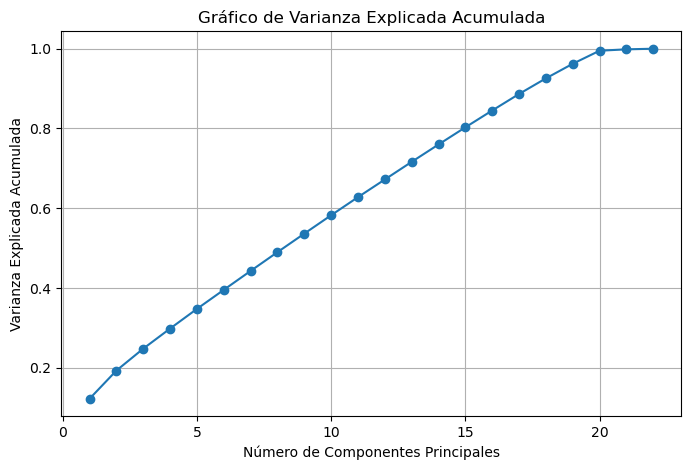

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada, marker='o')
plt.xlabel('N√∫mero de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Gr√°fico de Varianza Explicada Acumulada')
plt.grid(True)
plt.show()

--- Pruebas de Adecuaci√≥n para PCA ---
Determinante de la matriz de correlaci√≥n: 0.006720
KMO general: 0.5326

--- Tabla de Varianza Explicada ---
   Componente  Autovalor  Varianza %  Acumulado %
0          C1       2.69       12.23        12.23
1          C2       1.55        7.06        19.29
2          C3       1.21        5.49        24.78
3          C4       1.11        5.04        29.82
4          C5       1.09        4.93        34.75
5          C6       1.05        4.78        39.53
6          C7       1.04        4.74        44.28
7          C8       1.04        4.71        48.98
8          C9       1.02        4.65        53.63
9         C10       1.01        4.61        58.24
10        C11       1.00        4.54        62.78
11        C12       0.97        4.43        67.21
12        C13       0.97        4.42        71.63
13        C14       0.96        4.36        75.98
14        C15       0.95        4.30        80.28
15        C16       0.93        4.22        84.50
1

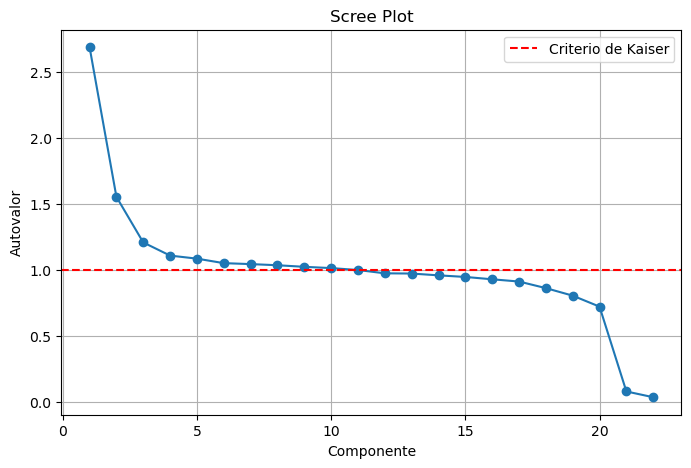

Componentes a retener seg√∫n el criterio de Kaiser: 10

--- Matriz de Cargas (Loadings) ---
                                                    Componente_1  \
Descuento                                                  0.033   
Deuda                                                     -0.018   
Edad                                                      -0.016   
Unidades curriculares 1.¬∫ semestre (matriculadas)          0.542   
Unidades curriculares 1.¬∫ semestre (evaluadas)             0.553   
Unidades curriculares 1.¬∫ semestre (aprobadas)             0.568   
Desarrollo de Tareas (%)                                   0.021   
Asistencia (%)                                             0.021   
Promedio ponderado del semestre                            0.247   
¬øLa distancia y la separaci√≥n de mi familia par...         0.009   
¬øLa incompatibilidad entre mis horarios de trab...        -0.004   
¬øLa calidad de la ense√±anza y las metodolog√≠as ...        -0.001   
¬øLa falta de r

In [36]:
# --- Paso 1: Pruebas de Esfericidad y Muestreo (Pre-PCA) ---
# Se utilizan para verificar si los datos son adecuados para PCA
from factor_analyzer.factor_analyzer import calculate_kmo

data_columns = ['Descuento', 'Deuda', 'Edad', 'Unidades curriculares 1.¬∫ semestre (matriculadas)',
               'Unidades curriculares 1.¬∫ semestre (evaluadas)','Unidades curriculares 1.¬∫ semestre (aprobadas)',
                'Desarrollo de Tareas (%)','Asistencia (%)','Promedio ponderado del semestre',
                '¬øLa distancia y la separaci√≥n de mi familia para estudiar en la universidad me hacen considerar abandonar mis estudios.?',
                '¬øLa incompatibilidad entre mis horarios de trabajo y las clases me llevar√≠a a abandonar la carrera.?',
               '¬øLa calidad de la ense√±anza y las metodolog√≠as docentes me desmotivan al punto de pensar en abandonar?',
                '¬øLa falta de recursos econ√≥micos, becas o facilidades de pago me har√≠a interrumpir mis estudios?',
                '¬øMe siento poco integrado/a con mis compa√±eros y actividades universitarias, lo que me hace pensar en abandonar?',
                '¬øEl estr√©s, la ansiedad u otros problemas de bienestar asociados a la vida universitaria me hacen considerar abandonar?',
                '¬øLa falta de seguridad dentro o cerca del campus influye en mi intenci√≥n de abandonar?',
                '¬øLa retroalimentaci√≥n tard√≠a o poco clara de los docentes afecta mi continuidad y me hace pensar en abandonar?',
                '¬øLa carrera/facultad donde estoy matriculado no cumple mis expectativas y me hace pensar en retirarme?',
               '¬øLa dificultad de los cursos supera mis capacidades actuales y me lleva a considerar dejar la universidad?',
                '¬øCuento con poco apoyo familiar para continuar mis estudios y eso me hace considerar el abandono?',
                '¬øMe cuesta adaptarme a la cultura y normas institucionales, lo que afecta mi permanencia?',
                '¬øNo veo una trayectoria profesional clara a partir de mi carrera actual, por lo que considerar√≠a retirarme?'] 

print("--- Pruebas de Adecuaci√≥n para PCA ---")

# Determinante de la matriz de correlaci√≥n
# Un determinante cercano a 0 indica alta correlaci√≥n entre variables
correlation_matrix = np.corrcoef(scaled_data.T)
print(f"Determinante de la matriz de correlaci√≥n: {np.linalg.det(correlation_matrix):.6f}")

# KMO (Kaiser-Meyer-Olkin)
# Un valor > 0.6 es considerado aceptable para aplicar PCA
_, kmo = calculate_kmo(scaled_data)
print(f"KMO general: {kmo:.4f}\n")


# --- Paso 2: Ejecutar PCA completo y analizar resultados ---
pca = PCA()
pca.fit(scaled_data)
autovalores = pca.explained_variance_

# Crear la tabla de varianza explicada
var_exp = pd.DataFrame({
    "Componente": [f"C{i+1}" for i in range(len(autovalores))],
    "Autovalor": autovalores,
    "Varianza %": pca.explained_variance_ratio_ * 100,
    "Acumulado %": np.cumsum(pca.explained_variance_ratio_) * 100
})

print("--- Tabla de Varianza Explicada ---")
print(var_exp.round(2))
print("\n")


# --- Paso 3: Visualizar con el Scree Plot ---
# Muestra cu√°nta varianza explica cada componente individualmente
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(autovalores) + 1), autovalores, marker='o')
plt.axhline(y=1, color='red', linestyle='--', label='Criterio de Kaiser')
plt.title("Scree Plot")
plt.xlabel("Componente")
plt.ylabel("Autovalor")
plt.legend()
plt.grid(True)
plt.show()


# --- Paso 4: Matriz de Cargas (Loadings) de los componentes ---
# Muestra la relaci√≥n entre las variables originales y los nuevos componentes
# Se usa el criterio de Kaiser (Autovalor > 1) para decidir cu√°ntos componentes retener
n_retener = sum(autovalores > 1)
print(f"Componentes a retener seg√∫n el criterio de Kaiser: {n_retener}\n")

cargas = pd.DataFrame(
    pca.components_.T[:, :n_retener],
    columns=[f"Componente_{i+1}" for i in range(n_retener)],
    index=data_columns # Aseg√∫rate de que esta variable tenga los nombres de tus columnas
)

print("--- Matriz de Cargas (Loadings) ---")
print(cargas.round(3))

Resultados:
- Determinante de la matriz de correlaci√≥n: El determinante es 0.006720, lo que indica que hay una alta correlaci√≥n entre las variables. Esto es bueno para PCA, ya que PCA funciona mejor cuando las variables est√°n correlacionadas entre s√≠.
- KMO general: El valor de KMO es 0.5326, lo que est√° por debajo del umbral recomendado de 0.6. Aunque no es el valor m√°s alto, todav√≠a es aceptable para aplicar PCA, pero ser√≠a ideal tener un valor mayor a 0.6 para asegurarse de que las variables sean adecuadas para PCA.

Como se puede ver, solo se qued√≥ con 10 componentes retenidos:

**Los autovalores son:**
- `C1: 2.69`
- `C2: 1.55`
- `C3: 1.21`
- `C4: 1.11`
- `C5: 1.09`
- `C6: 1.05`
- `C7: 1.04`
- `C8: 1.04`
- `C9: 1.02`
- `C10: 1.01`

Esto significa que solo los primeros 10 componentes son los que explican una proporci√≥n significativa de la varianza. Adem√°s, esto lo verifica el criterio de Kaiser que recomienda retener solo 10 primeros componentes para capturar la mayor parte de la varianza (58.24% de la varianza explicada).

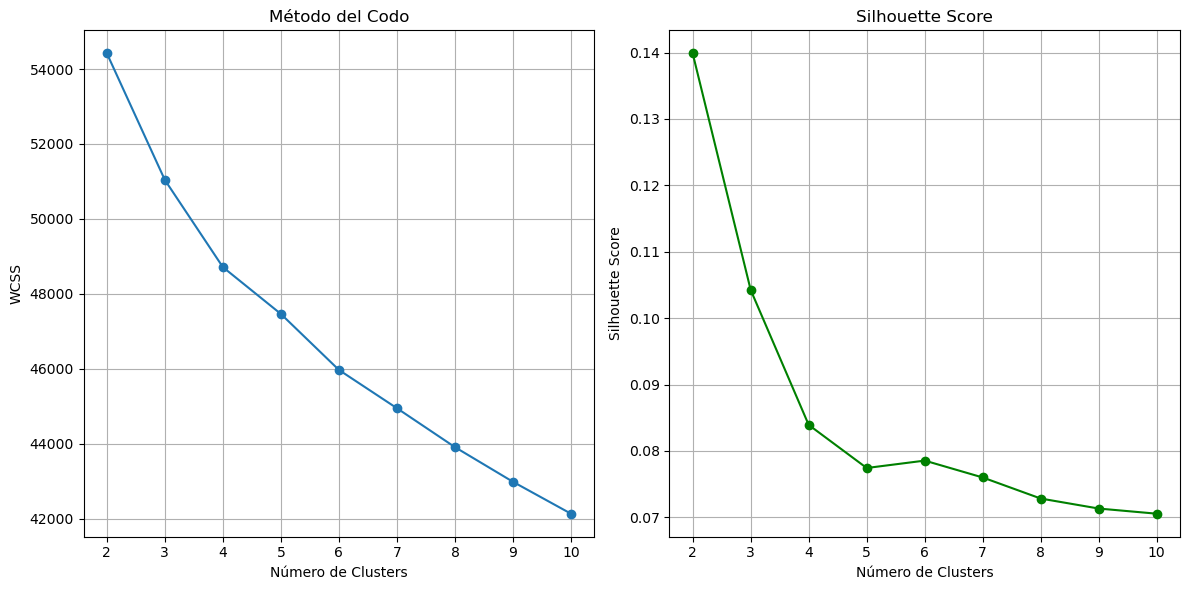

In [40]:
from sklearn.metrics import silhouette_score

#Seleccionamos la cantidad de componente principales
pca = PCA(n_components=10)
X_pca = pca.fit_transform(scaled_data)

# Usamos los primeros 10 componentes principales (X_pca con 10 componentes)
X_pca_10 = X_pca[:, :10]

# Almacenar WCSS (Suma dentro de los cuadrados de los clusters)
wcss = []
sil_scores = []

# Probar con diferentes valores de k (de 2 a 10)
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca_10)
    wcss.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_pca_10, kmeans.labels_))

# Graficar el M√©todo del Codo
plt.figure(figsize=(12, 6))

# WCSS
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), wcss, marker='o')
plt.title("M√©todo del Codo")
plt.xlabel("N√∫mero de Clusters")
plt.ylabel("WCSS")
plt.grid(True)

# Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), sil_scores, marker='o', color='green')
plt.title("Silhouette Score")
plt.xlabel("N√∫mero de Clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)

plt.tight_layout()
plt.show()

- M√©todo del codo: La reducci√≥n en WCSS (within-cluster sum of squares) es pronunciada al pasar de 2 clusters a 3 clusters, pero despu√©s de eso, la mejora se va estabilizando de manera mucho m√°s gradual. Esto indica que el punto √≥ptimo para el n√∫mero de clusters seg√∫n este criterio es 2 o 3.
- M√©todo de la Silueta: El Silhouette Score es m√°s alto para 2 clusters, con un valor cercano a 0.14, pero luego disminuye significativamente al aumentar el n√∫mero de clusters. Esto indica que el modelo con 2 clusters es el que mejor ajusta los datos en t√©rminos de calidad de agrupamiento.

### CONCLUSI√ìN
Si se prioriza la reducci√≥n de la variabilidad (capturando m√°s de los datos), podr√≠as optar por 3 clusters. Si priorizas la calidad del agrupamiento, 2 clusters parecen ser la mejor opci√≥n.

Centros de los clusters:
[[ 1.39976109 -0.18681614 -0.00934179  0.00612454  0.00817037  0.010222
  -0.01030996 -0.00347197  0.00477121 -0.01399465]
 [-1.3535062   0.18064283  0.00903309 -0.00592215 -0.00790038 -0.00988421
   0.00996927  0.00335724 -0.00461354  0.01353219]]


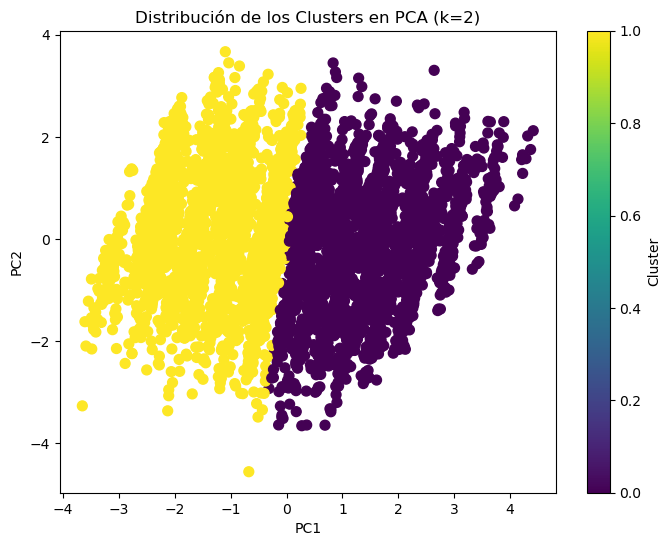

In [41]:
# Aplicando K-Means con el n√∫mero de clusters √≥ptimo
kmeans = KMeans(n_clusters=2, random_state=42)  # clusters seg√∫n el codo
kmeans.fit(X_pca_10)

# Asignar las etiquetas de los clusters al dataframe
numeric_data["Cluster"] = kmeans.labels_

# Obtener los centros de los clusters
cluster_centers = kmeans.cluster_centers_
print(f"Centros de los clusters:\n{cluster_centers}")

# Visualizar el resultado en el espacio de las dos primeras componentes principales (PCA)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_10[:, 0], X_pca_10[:, 1], c=kmeans.labels_, cmap="viridis", s=50)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Distribuci√≥n de los Clusters en PCA (k=2)")
plt.colorbar(label="Cluster")
plt.show()

In [44]:
# Ahora eliminar la columna 'Cluster' antes de realizar PCA o cualquier an√°lisis posterior
numeric_data_without_cluster = numeric_data.drop(columns=['Cluster'])

# Aplicar PCA con las variables num√©ricas originales (sin la columna 'Cluster')
pca = PCA(n_components=10)
X_pca_10 = pca.fit_transform(numeric_data_without_cluster)

numeric_data_without_cluster.describe().T

count        mean  \
Descuento                                           5000.0  498.158632   
Deuda                                               5000.0  960.131896   
Edad                                                5000.0   21.595400   
Unidades curriculares 1.¬∫ semestre (matriculadas)   5000.0    5.999200   
Unidades curriculares 1.¬∫ semestre (evaluadas)      5000.0    5.502000   
Unidades curriculares 1.¬∫ semestre (aprobadas)      5000.0    3.511800   
Desarrollo de Tareas (%)                            5000.0   79.186820   
Asistencia (%)                                      5000.0   84.553320   
Promedio ponderado del semestre                     5000.0   12.746932   
¬øLa distancia y la separaci√≥n de mi familia par...  5000.0    2.976800   
¬øLa incompatibilidad entre mis horarios de trab...  5000.0    2.999000   
¬øLa calidad de la ense√±anza y las metodolog√≠as ...  5000.0    2.760400   
¬øLa falta de recursos econ√≥micos, becas o facil...  5000.0    3.556400   
¬øMe siento poco integrado/a con mis compa√±eros ...  5000.0    2.818000   
¬øEl estr√©s, la ansiedad u otros problemas de bi...  5000.0    2.930600   
¬øLa falta de seguridad dentro o cerca del campu...  5000.0    2.689200   
¬øLa retroalimentaci√≥n tard√≠a o poco clara de lo...  5000.0    2.695600   
¬øLa carrera/facultad donde estoy matriculado no...  5000.0    2.865000   
¬øLa dificultad de los cursos supera mis capacid...  5000.0    3.333400   
¬øCuento con poco apoyo familiar para continuar ...  5000.0    2.866200   
¬øMe cuesta adaptarme a la cultura y normas inst...  5000.0    2.858800   
¬øNo veo una trayectoria profesional clara a par...  5000.0    2.756600   

                                                           std    min  \
Descuento                                           346.624256   5.51   
Deuda                                               885.856249   0.87   
Edad                                                  3.072065  16.00   
Unidades curriculares 1.¬∫ semestre (matriculadas)     1.410389   4.00   
Unidades curriculares 1.¬∫ semestre (evaluadas)        1.513953   3.00   
Unidades curriculares 1.¬∫ semestre (aprobadas)        1.331546   1.00   
Desarrollo de Tareas (%)                             10.126950  38.30   
Asistencia (%)                                        8.251159  50.60   
Promedio ponderado del semestre                       2.990212   5.00   
¬øLa distancia y la separaci√≥n de mi familia par...    1.502902   1.00   
¬øLa incompatibilidad entre mis horarios de trab...    1.549929   1.00   
¬øLa calidad de la ense√±anza y las metodolog√≠as ...    1.535534   1.00   
¬øLa falta de recursos econ√≥micos, becas o facil...    1.450669   1.00   
¬øMe siento poco integrado/a con mis compa√±eros ...    1.518070   1.00   
¬øEl estr√©s, la ansiedad u otros problemas de bi...    1.532140   1.00   
¬øLa falta de seguridad dentro o cerca del campu...    1.508860   1.00   
¬øLa retroalimentaci√≥n tard√≠a o poco clara de lo...    1.540200   1.00   
¬øLa carrera/facultad donde estoy matriculado no...    1.528673   1.00   
¬øLa dificultad de los cursos supera mis capacid...    1.531507   1.00   
¬øCuento con poco apoyo familiar para continuar ...    1.535959   1.00   
¬øMe cuesta adaptarme a la cultura y normas inst...    1.539525   1.00   
¬øNo veo una trayectoria profesional clara a par...    1.518755   1.00   

                                                         25%     50%  \
Descuento                                           244.1675  415.49   
Deuda                                               331.0125  712.79   
Edad                                                 19.0000   22.00   
Unidades curriculares 1.¬∫ semestre (matriculadas)     5.0000    6.00   
Unidades curriculares 1.¬∫ semestre (evaluadas)        4.0000    5.00   
Unidades curriculares 1.¬∫ semestre (aprobadas)        3.0000    3.00   
Desarrollo de Tareas (%)                             72.5000   79.30   
Asistencia (%)                             

In [46]:
# Obtener los loadings de PCA
#loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(10)], index=[f'Variable_{i+1}' for i in range(22)])
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(10)], index=numeric_data_without_cluster.columns)


# Mostrar los loadings
print("Loadings de PCA:")
print(loadings)

# Crear un dataframe con los centros de los clusters para los 10 componentes principales
centros_clusters = pd.DataFrame(kmeans.cluster_centers_, columns=[f'PC{i+1}' for i in range(10)])

# Mostrar los centros de los clusters
print("Centros de los Cl√∫steres:")
print(centros_clusters)



Loadings de PCA:
                                                             PC1  \
Descuento                                          -8.751949e-03   
Deuda                                               9.999615e-01   
Edad                                                7.866421e-05   
Unidades curriculares 1.¬∫ semestre (matriculadas)   2.098471e-06   
Unidades curriculares 1.¬∫ semestre (evaluadas)      8.692275e-06   
Unidades curriculares 1.¬∫ semestre (aprobadas)     -3.914415e-05   
Desarrollo de Tareas (%)                           -5.092475e-04   
Asistencia (%)                                     -1.181094e-04   
Promedio ponderado del semestre                    -1.692059e-04   
¬øLa distancia y la separaci√≥n de mi familia par...  2.686871e-05   
¬øLa incompatibilidad entre mis horarios de trab... -1.534307e-06   
¬øLa calidad de la ense√±anza y las metodolog√≠as ...  2.838674e-05   
¬øLa falta de recursos econ√≥micos, becas o facil...  2.962740e-04   
¬øMe siento poco int

### INTERPRETACI√ìN DE LOS COMPONENTES PRINCIPALES
**1. PC1: Deuda Financiera üí∞**

- Variables con carga alta: Deuda (0.999) y Descuento (0.008).

- Interpretaci√≥n: Este componente est√° casi completamente dominado por la variable Deuda. Representa la dimensi√≥n econ√≥mica de los estudiantes, espec√≠ficamente el peso de sus obligaciones financieras, independientemente de si tienen un descuento. Un valor alto en PC1 sugiere un alto nivel de deuda, mientras que un valor bajo indica una deuda menor.

**2. PC2: Beneficios y Apoyo Financiero üí∏**

- Variables con carga alta: Descuento (0.999) y Deuda (0.008).

- Interpretaci√≥n: Similar al PC1, este componente se centra en el aspecto econ√≥mico. Sin embargo, su carga principal es el Descuento, lo que sugiere que este componente describe a estudiantes que reciben alg√∫n tipo de beneficio financiero.

**3. PC3: Rendimiento en Tareas y Asistencia ‚úçÔ∏è**

- Variables con carga alta: Desarrollo de Tareas (%) (0.979) y Asistencia (%) (0.197).

- Interpretaci√≥n: Este componente se relaciona con la participaci√≥n y el esfuerzo acad√©mico del estudiante, principalmente medido por el porcentaje de tareas completadas. Tambi√©n tiene una conexi√≥n positiva, aunque m√°s d√©bil, con la asistencia a clases. Un alto valor en este componente significa que el estudiante es diligente con sus tareas y asiste a clases.

**4. PC4: Asistencia y Compromiso üèÉ‚Äç‚ôÇÔ∏è**

- Variables con carga alta: Asistencia (%) (0.979) y Desarrollo de Tareas (%) (-0.198).

- Interpretaci√≥n: Este componente est√° fuertemente definido por la asistencia a clases. La carga negativa con Desarrollo de Tareas (%) es interesante, aunque no tan fuerte como para sugerir una relaci√≥n inversa significativa. En general, este PC representa el nivel de compromiso del estudiante medido por su asistencia.

**5. PC5: √âxito Acad√©mico General üéì**

- Variables con carga alta: Promedio ponderado del semestre (0.915) y Unidades curriculares 1.¬∫ semestre (aprobadas) (0.316).

- Interpretaci√≥n: Este componente es un claro indicador del √©xito acad√©mico del estudiante. Combina la calificaci√≥n promedio y el n√∫mero de cursos aprobados en el primer semestre, proporcionando una medida hol√≠stica del rendimiento acad√©mico.

**6. PC6: Edad y Madurez del Estudiante üßë‚Äçü¶≥**

- Variables con carga alta: Edad (0.997).

- Interpretaci√≥n: Este componente est√° casi exclusivamente determinado por la Edad del estudiante. Representa una dimensi√≥n de madurez o demograf√≠a, diferenciando a los estudiantes m√°s j√≥venes de los de mayor edad, lo que podr√≠a estar relacionado con diferentes etapas de vida o contextos.

**7. PC7: Carga Acad√©mica üìö**

- Variables con carga alta: Unidades curriculares 1.¬∫ semestre (evaluadas) (0.658), Unidades curriculares 1.¬∫ semestre (matriculadas) (0.606) y Unidades curriculares 1.¬∫ semestre (aprobadas) (0.367).

- Interpretaci√≥n: Este componente agrupa variables que miden la carga acad√©mica del estudiante, como el n√∫mero de unidades matriculadas, evaluadas y aprobadas. Describe a los estudiantes en funci√≥n de la cantidad de cursos que manejan.

**8. PC8: Adaptaci√≥n e Integraci√≥n Social ü§ó**

- Variables con carga alta: ¬øMe cuesta adaptarme a la cultura y normas institucionales? (0.586), ¬øLa incompatibilidad entre mis horarios de trabajo y estudio? (-0.468), ¬øLa retroalimentaci√≥n tard√≠a o poco clara de los docentes? (-0.420), ¬øLa distancia y la separaci√≥n de mi familia? (0.257)

- Interpretaci√≥n: Este componente es m√°s complejo. Las altas cargas positivas en adaptaci√≥n y distancia familiar sugieren que este componente est√° relacionado con desaf√≠os personales de adaptaci√≥n y la nostalgia por el hogar. Las cargas negativas en incompatibilidad de horarios y retroalimentaci√≥n podr√≠an indicar que estos estudiantes no experimentan esos problemas, lo que podr√≠a significar que no trabajan o tienen una mejor comunicaci√≥n con sus docentes.

**9. PC9: Dificultades con el Entorno Acad√©mico y Social üòî**

- Variables con carga alta: ¬øLa incompatibilidad entre mis horarios de trabajo y estudio? (0.582), ¬øMe siento poco integrado/a con mis compa√±eros? (0.348), ¬øLa calidad de la ense√±anza y las metodolog√≠as de los docentes? (0.333), ¬øLa retroalimentaci√≥n tard√≠a o poco clara de los docentes? (-0.506).

- Interpretaci√≥n: Este componente describe las dificultades relacionadas con el entorno acad√©mico y social. Un alto valor sugiere problemas con los horarios, la integraci√≥n social y la calidad de la ense√±anza. Curiosamente, la carga negativa en retroalimentaci√≥n sugiere que los estudiantes con estos problemas no perciben un problema significativo con la retroalimentaci√≥n de los docentes.

**10. PC10: Apoyo Familiar y Bienestar Emocional ü´Ç**

- Variables con carga alta: ¬øCuento con poco apoyo familiar para continuar mis estudios? (0.744) y ¬øEl estr√©s, la ansiedad u otros problemas de bienestar? (0.406).

- Interpretaci√≥n: Este componente est√° claramente relacionado con el bienestar emocional y el apoyo familiar. Un alto valor indica que el estudiante se siente falto de apoyo familiar y experimenta altos niveles de estr√©s y ansiedad.

### INTERPRETACI√ìN DE LOS CLUSTERS

**Cluster 1: Estudiantes con bajo nivel de estr√©s y buen rendimiento acad√©mico**

Perfil:

- Bajo nivel de deuda y sin beneficios financieros.

- Comprometidos con el rendimiento acad√©mico, completan tareas y asisten a clases.

- Alto rendimiento acad√©mico, con bajo nivel de estr√©s y sin mayores problemas de adaptaci√≥n social.

- En general, estos estudiantes se caracterizan por un alto rendimiento y bajas dificultades emocionales.

**Cluster 2: Estudiantes con alto estr√©s y dificultades acad√©micas y sociales**

Perfil:

- Alta deuda y con descuentos.

- Tienen menor rendimiento acad√©mico, con dificultades para completar tareas y menor asistencia.

- M√°s dificultades sociales y problemas para adaptarse a la universidad.

- Altos niveles de estr√©s y poco apoyo familiar, lo que afecta su bienestar y desempe√±o acad√©mico.

In [47]:
# Realizar ANOVA para comparar las variables num√©ricas entre los clusters
# A√±adir etiquetas de cluster a los datos
numeric_data_with_clusters = numeric_data.copy()
numeric_data_with_clusters['Cluster'] = kmeans.labels_

# Realizar ANOVA para cada variable num√©rica
anova_results = {}
for col in numeric_data.columns:
    f_val, p_val = stats.f_oneway(*(numeric_data_with_clusters[numeric_data_with_clusters['Cluster'] == i][col] for i in range(kmeans.n_clusters)))
    anova_results[col] = {'F-valor': f_val, 'P-valor': p_val}

# Crear una tabla ANOVA
anova_table = pd.DataFrame(anova_results).T
print("Tabla ANOVA:")
print(anova_table)

Tabla ANOVA:
                                                         F-valor       P-valor
Descuento                                           1.841945e+00  1.747844e-01
Deuda                                               1.197391e-02  9.128695e-01
Edad                                                1.431245e-01  7.052104e-01
Unidades curriculares 1.¬∫ semestre (matriculadas)   1.069092e+04  0.000000e+00
Unidades curriculares 1.¬∫ semestre (evaluadas)      9.244337e+03  0.000000e+00
Unidades curriculares 1.¬∫ semestre (aprobadas)      5.960498e+03  0.000000e+00
Desarrollo de Tareas (%)                            2.500030e-02  8.743727e-01
Asistencia (%)                                      3.480262e-01  5.552593e-01
Promedio ponderado del semestre                     2.607742e+02  3.195951e-57
¬øLa distancia y la separaci√≥n de mi familia par...  2.239371e-02  8.810505e-01
¬øLa incompatibilidad entre mis horarios de trab...  7.089360e-04  9.787592e-01
¬øLa calidad de la ense√±anza y l

/opt/conda/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


# Interpretaci√≥n de los resultados de ANOVA

# Crear la interpretaci√≥n de los resultados en formato de texto
interpretacion_anova = """
**Interpretaci√≥n de los Resultados de ANOVA:**

Los resultados obtenidos de la prueba ANOVA comparando las variables num√©ricas entre los dos clusters muestran lo siguiente:

### Variables con diferencias significativas (p < 0.05):

1. **Unidades curriculares 1.¬∫ semestre (matriculadas)**
   - **F-valor**: 1.069092e+04, **P-valor**: 0.000000e+00
   - **Interpretaci√≥n**: Existe una diferencia **muy significativa** en el n√∫mero de unidades curriculares matriculadas entre los dos clusters. Esto sugiere que el n√∫mero de unidades matriculadas es un **factor diferenciador clave** entre los clusters.

2. **Unidades curriculares 1.¬∫ semestre (evaluadas)**
   - **F-valor**: 9.244337e+03, **P-valor**: 0.000000e+00
   - **Interpretaci√≥n**: Similar a las unidades matriculadas, tambi√©n hay una **gran diferencia** en las unidades evaluadas entre los clusters.

3. **Unidades curriculares 1.¬∫ semestre (aprobadas)**
   - **F-valor**: 5.960498e+03, **P-valor**: 0.000000e+00
   - **Interpretaci√≥n**: La diferencia en las unidades aprobadas tambi√©n es **muy significativa**. Esto refuerza la diferencia de rendimiento acad√©mico entre los dos clusters.

4. **Promedio ponderado del semestre**
   - **F-valor**: 2.607742e+02, **P-valor**: 3.195951e-57
   - **Interpretaci√≥n**: Existe una diferencia extremadamente **significativa** en el **promedio ponderado** entre los clusters. Un valor tan bajo de p indica una diferencia muy fuerte en el rendimiento acad√©mico entre los dos clusters.

5. **Estr√©s, ansiedad u otros problemas de bienestar**
   - **F-valor**: 8.778051e+00, **P-valor**: 3.063137e-03
   - **Interpretaci√≥n**: Se observan **diferencias significativas** en los niveles de estr√©s entre los clusters. Esto sugiere que uno de los grupos de estudiantes experimenta m√°s estr√©s y ansiedad que el otro.

6. **Dificultad de los cursos supera mis capacidades actuales**
   - **F-valor**: 8.296746e+00, **P-valor**: 3.988511e-03
   - **Interpretaci√≥n**: Hay una diferencia **significativa** en la percepci√≥n de dificultad de los cursos entre los clusters. Este es un factor relevante para la posible deserci√≥n acad√©mica.

7. **Retroalimentaci√≥n tard√≠a o poco clara de los docentes**
   - **F-valor**: 4.900318e+00, **P-valor**: 2.689674e-02
   - **Interpretaci√≥n**: La diferencia en la percepci√≥n de la retroalimentaci√≥n docente tambi√©n es significativa, lo que puede ser un factor importante en la deserci√≥n estudiantil.

### Variables sin diferencias significativas (p ‚â• 0.05):

1. **Deuda**
   - **P-valor**: 0.9128695
   - No hay una **diferencia significativa** entre los clusters en cuanto a la deuda, lo que indica que la deuda no es un factor clave para diferenciar los clusters.

2. **Edad**
   - **P-valor**: 0.7052104
   - La **edad** tampoco es una variable significativa para diferenciar los clusters.

3. **Desarrollo de Tareas (%)**
   - **P-valor**: 0.8743727
   - La diferencia en el **desarrollo de tareas** no es significativa entre los clusters.

4. **Asistencia (%)**
   - **P-valor**: 0.5552593
   - La **asistencia** a clases no parece ser un factor diferenciador entre los dos clusters.

5. **La calidad de la ense√±anza y metodolog√≠as**
   - **P-valor**: 0.7517118
   - No se observa una diferencia significativa en la **calidad de la ense√±anza** entre los clusters.

6. **La incompatibilidad entre los horarios de trabajo y estudio**
   - **P-valor**: 0.9787592
   - No hay diferencias significativas en cuanto a la **incompatibilidad de horarios** entre los clusters.

7. **La falta de recursos econ√≥micos, becas o facilidades de pago**
   - **P-valor**: 0.1773112
   - Aunque tiene un **F-valor** relativamente alto, no es significativa en t√©rminos de diferencias entre clusters.

8. **Integraci√≥n social y actividades**
   - **P-valor**: 0.1286755
   - No se perciben diferencias significativas en la **integraci√≥n social** entre los clusters.

9. **La falta de seguridad dentro o cerca del campus**
   - **P-valor**: 0.8917916
   - No hay una diferencia significativa en cuanto a **la seguridad** en el campus.

10. **La carrera/facultad donde estoy matriculado**
   - **P-valor**: 0.2912734
   - No se observa una diferencia significativa en la **satisfacci√≥n con la carrera** entre los clusters.

### **Conclusiones:**
- **Cluster 1** y **Cluster 2** se diferencian significativamente en varias variables clave, especialmente en **rendimiento acad√©mico** (unidades matriculadas, evaluadas y aprobadas), **promedio ponderado** y **niveles de estr√©s**. 
- Las variables **econ√≥micas** (como deuda, descuento) no parecen ser un factor diferenciador significativo, pero la **adaptaci√≥n acad√©mica y el estr√©s** s√≠ lo son.
- Las variables relacionadas con el **bienestar emocional** y la **dificultad percibida de los cursos** tambi√©n son clave para diferenciar los clusters.
"""

# Mostrar la interpretaci√≥n
print(interpretacion_anova)


In [68]:
# Generar resumen estad√≠stico de los clusters
cluster_summary = numeric_data.groupby('Cluster').agg(['mean', 'std'])
print("\nResumen Estad√≠stico de los Clusters:")
print(cluster_summary)


Resumen Estad√≠stico de los Clusters:
          Descuento                    Deuda                   Edad            \
               mean         std         mean         std       mean       std   
Cluster                                                                         
0        501.294500  340.451278  1045.582352  975.045561  21.611395  3.029492   
1        480.761595  340.213227   941.656770  860.080637  21.610895  3.113483   
2        518.142952  359.071987   909.975187  831.221304  21.561270  3.056004   

        Unidades curriculares 1.¬∫ semestre (matriculadas)            \
                                                     mean       std   
Cluster                                                               
0                                                6.827611  0.881634   
1                                                4.597276  0.629581   
2                                                7.109206  0.852985   

        Unidades curriculares 1.¬∫ semestre (e

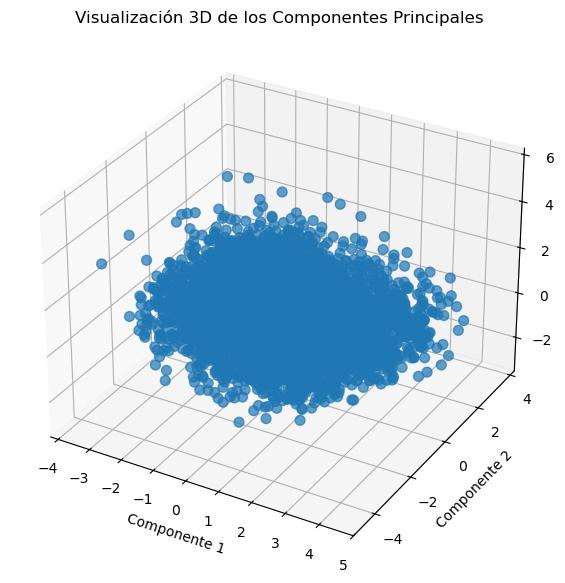

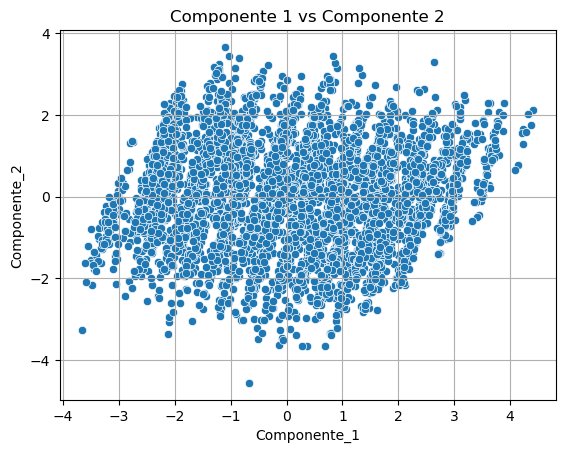

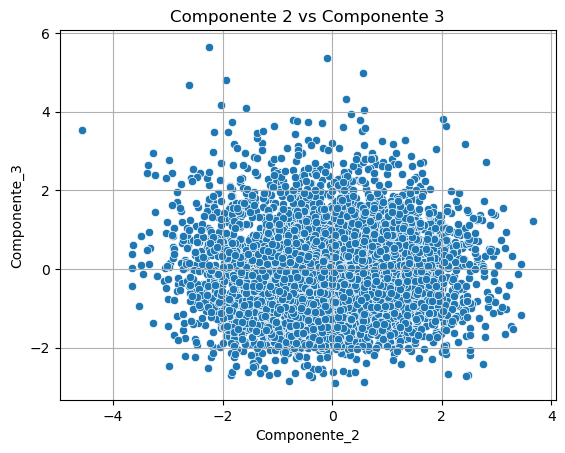

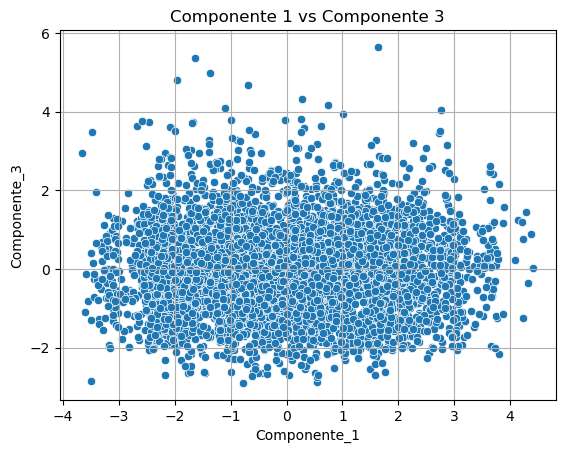

In [69]:
pca_final = PCA(n_components=n_retener)
data_proj = pca_final.fit_transform(scaled_data) 
df_pca = pd.DataFrame(data_proj, columns=[f"Componente_{i+1}" for i in range(n_retener)])


# --- 2. Gr√°fico 3D (Si aplica) ---
# Se verifica si hay al menos 3 componentes para poder graficar en 3D
if n_retener >= 3:
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df_pca["Componente_1"], df_pca["Componente_2"], df_pca["Componente_3"], s=50, alpha=0.7)
    ax.set_title("Visualizaci√≥n 3D de los Componentes Principales")
    ax.set_xlabel("Componente 1")
    ax.set_ylabel("Componente 2")
    ax.set_zlabel("Componente 3")
    plt.show()
else:
    print("No se generaron suficientes componentes (> 3) para graficar en 3D.")


# --- 3. Gr√°ficos 2D (Siempre √∫tiles) ---
# Gr√°fico de los dos primeros componentes
sns.scatterplot(x="Componente_1", y="Componente_2", data=df_pca).set_title("Componente 1 vs Componente 2")
plt.grid(True)
plt.show()

# Gr√°fico de los siguientes componentes (si existen)
if n_retener >= 3:
    sns.scatterplot(x="Componente_2", y="Componente_3", data=df_pca).set_title("Componente 2 vs Componente 3")
    plt.grid(True)
    plt.show()

    sns.scatterplot(x="Componente_1", y="Componente_3", data=df_pca).set_title("Componente 1 vs Componente 3")
    plt.grid(True)
    plt.show()
else:
    print("No hay suficientes componentes para graficar C2 vs C3 o C1 vs C3.")